In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from tensorflow.keras.utils import to_categorical #For One-hot Encoding
from tensorflow.keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping


In [3]:
#Cheking datasets
import os
paths = os.listdir(path="./chest_xray/test")
print(paths)

['PNEUMONIA', 'NORMAL']


In [4]:
path_train = "./chest_xray/train"
path_val = "./chest_xray/val"
path_test = "./chest_xray/test"

In [5]:
img = glob(path_train+"/PNEUMONIA/*.jpeg") #Getting all images in this folder

In [6]:
img = np.asarray(plt.imread(img[0]))

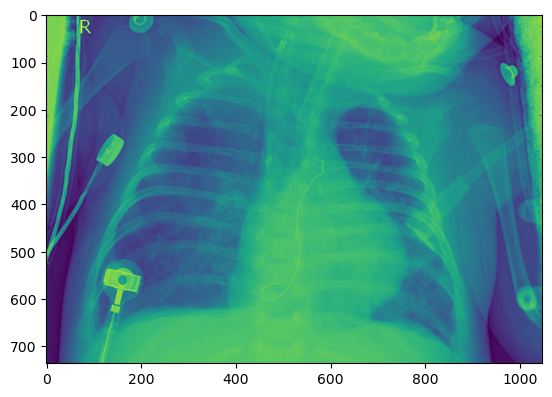

In [7]:
plt.imshow(img)

In [8]:
img.shape #Checking the shape of this image. It seems like a two deminsional shape (1422 x 1152)

(736, 1048)

In [9]:
img = glob(path_train+"/NORMAL/*.jpeg") #Getting all images in this folder

In [10]:
img = np.asarray(plt.imread(img[0]))

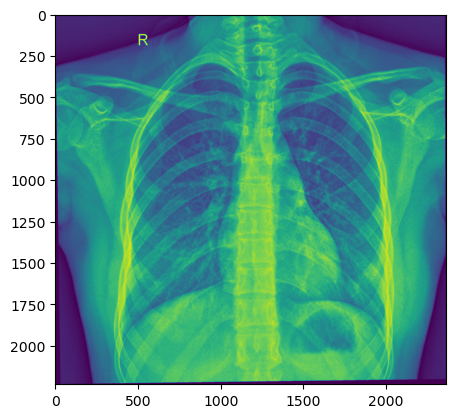

In [11]:
plt.imshow(img)

In [12]:
#Data preprocessing and analysis
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(path_train+"/NORMAL/*.jpeg")
train_data += glob(path_train+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator() #Augmentation happens here
#But in this example we're not going to give the ImageDataGenerator method any parameters to augment our data.

In [26]:
train_batches = data_gen.flow_from_directory(path_train, target_size = (226, 226), classes = classes, class_mode = "categorical")
val_batches = data_gen.flow_from_directory(path_val, target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batches = data_gen.flow_from_directory(path_test, target_size = (226, 226), classes = classes, class_mode = "categorical")

Found 5216 images belonging to 2 classes.
(array([[[[ 45.,  45.,  45.],
         [ 52.,  52.,  52.],
         [ 55.,  55.,  55.],
         ...,
         [ 25.,  25.,  25.],
         [ 22.,  22.,  22.],
         [ 11.,  11.,  11.]],

        [[ 46.,  46.,  46.],
         [ 53.,  53.,  53.],
         [ 55.,  55.,  55.],
         ...,
         [ 25.,  25.,  25.],
         [ 22.,  22.,  22.],
         [ 12.,  12.,  12.]],

        [[ 48.,  48.,  48.],
         [ 57.,  57.,  57.],
         [ 59.,  59.,  59.],
         ...,
         [ 25.,  25.,  25.],
         [ 21.,  21.,  21.],
         [ 14.,  14.,  14.]],

        ...,

        [[ 15.,  15.,  15.],
         [ 13.,  13.,  13.],
         [  6.,   6.,   6.],
         ...,
         [ 24.,  24.,  24.],
         [ 24.,  24.,  24.],
         [ 24.,  24.,  24.]],

        [[ 15.,  15.,  15.],
         [ 13.,  13.,  13.],
         [  9.,   9.,   9.],
         ...,
         [ 24.,  24.,  24.],
         [ 24.,  24.,  24.],
         [ 24.,  24.,  2

KeyboardInterrupt: 

In [14]:
train_batches.image_shape

(226, 226, 3)

In [15]:
#This is a Convolutional Artificial Neural Network
#VGG16 Model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [16]:
#Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 226, 226, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 228, 228, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 226, 226, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 128)     7

In [27]:
import tensorflow as tf
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')
checkpoint_cb =tf.keras.callbacks.ModelCheckpoint('x-ray-cnn-model.h5')
early_stopping_cb =tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history =model.fit(train_batches,epochs=3)


Epoch 1/3
163/163 [==============================] - 1433s 9s/step - loss: 0.6068 - accuracy: 0.7497
Epoch 2/3
163/163 [==============================] - 1450s 9s/step - loss: 0.5749 - accuracy: 0.7416
Epoch 3/3
 46/163 [=======>......................] - ETA: 17:21 - loss: 0.5811 - accuracy: 0.7490

KeyboardInterrupt: 

In [28]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

NameError: name 'history' is not defined

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

NameError: name 'history' is not defined